In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | uchaly
Processing Record 4 of Set 1 | el sauce
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | a
City not found. Skipping...
Processing Record 8 of Set 1 | darnah
Processing Record 9 of Set 1 | langsa
Processing Record 10 of Set 1 | pedernales
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mvomero
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 1 | gillette
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | keila
Processing Record 21 of Set 1 | mataura
Processing Record 22 of

Processing Record 37 of Set 4 | sept-iles
Processing Record 38 of Set 4 | ancud
Processing Record 39 of Set 4 | senanga
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | ambalavao
Processing Record 42 of Set 4 | penzance
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | isla mujeres
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | alanya
Processing Record 48 of Set 4 | guaratinga
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | amazar
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | bouna
Processing Record 4 of Set 5 | anloga
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | roblin
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | samusu
City not found. Skipping...
Processing Record 9 of Set 5 | dzaoudzi
Processing 

Processing Record 24 of Set 8 | sembakung
Processing Record 25 of Set 8 | salalah
Processing Record 26 of Set 8 | paamiut
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | akureyri
Processing Record 29 of Set 8 | mantua
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | shingu
Processing Record 32 of Set 8 | nikolsko-arkhangelskiy
City not found. Skipping...
Processing Record 33 of Set 8 | biella
Processing Record 34 of Set 8 | kuliyapitiya
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | kondinskoye
Processing Record 37 of Set 8 | celestun
Processing Record 38 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 39 of Set 8 | vostok
Processing Record 40 of Set 8 | harer
Processing Record 41 of Set 8 | aktau
Processing Record 42 of Set 8 | jiaocheng
Processing Record 43 of Set 8 | altay
Processing Record 44 of Set 8 | porosozero
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | 

Processing Record 13 of Set 12 | balkanabat
Processing Record 14 of Set 12 | sao jose da coroa grande
Processing Record 15 of Set 12 | flin flon
Processing Record 16 of Set 12 | salina
Processing Record 17 of Set 12 | les cayes
Processing Record 18 of Set 12 | georgiyevka
Processing Record 19 of Set 12 | vila velha
Processing Record 20 of Set 12 | itacarambi
Processing Record 21 of Set 12 | salto
Processing Record 22 of Set 12 | nantucket
Processing Record 23 of Set 12 | rapid valley
Processing Record 24 of Set 12 | inta
Processing Record 25 of Set 12 | peterhead
Processing Record 26 of Set 12 | caldwell
Processing Record 27 of Set 12 | latur
Processing Record 28 of Set 12 | karymskoye
Processing Record 29 of Set 12 | vao
Processing Record 30 of Set 12 | rio grande
Processing Record 31 of Set 12 | ercis
Processing Record 32 of Set 12 | guangyuan
Processing Record 33 of Set 12 | manzanillo
Processing Record 34 of Set 12 | honiara
Processing Record 35 of Set 12 | bakchar
Processing Recor

In [11]:
len(city_data)

559

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,88,40,11.50,TO,2021-11-30 18:46:08
1,Carnarvon,-24.8667,113.6333,68.07,77,40,20.71,AU,2021-11-30 18:46:08
2,Uchaly,54.2996,59.4521,28.36,85,100,16.87,RU,2021-11-30 18:46:08
3,El Sauce,12.8869,-86.5390,84.40,36,4,8.95,NI,2021-11-30 18:46:09
4,Bluff,-46.6000,168.3333,51.80,80,100,15.12,NZ,2021-11-30 18:46:09
5,Lebu,-37.6167,-73.6500,60.80,70,1,13.15,CL,2021-11-30 18:46:09
6,Darnah,32.7670,22.6367,62.94,60,100,23.73,LY,2021-11-30 18:46:10
7,Langsa,4.4683,97.9683,73.98,97,100,2.64,ID,2021-11-30 18:46:10
8,Pedernales,18.0384,-71.7440,84.45,58,41,5.70,DO,2021-11-30 18:46:11
9,Rikitea,-23.1203,-134.9692,76.26,75,0,21.63,PF,2021-11-30 18:46:11


In [13]:
# New column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-11-30 18:46:08,-21.2000,-175.2000,75.36,88,40,11.50
1,Carnarvon,AU,2021-11-30 18:46:08,-24.8667,113.6333,68.07,77,40,20.71
2,Uchaly,RU,2021-11-30 18:46:08,54.2996,59.4521,28.36,85,100,16.87
3,El Sauce,NI,2021-11-30 18:46:09,12.8869,-86.5390,84.40,36,4,8.95
4,Bluff,NZ,2021-11-30 18:46:09,-46.6000,168.3333,51.80,80,100,15.12
5,Lebu,CL,2021-11-30 18:46:09,-37.6167,-73.6500,60.80,70,1,13.15
6,Darnah,LY,2021-11-30 18:46:10,32.7670,22.6367,62.94,60,100,23.73
7,Langsa,ID,2021-11-30 18:46:10,4.4683,97.9683,73.98,97,100,2.64
8,Pedernales,DO,2021-11-30 18:46:11,18.0384,-71.7440,84.45,58,41,5.70
9,Rikitea,PF,2021-11-30 18:46:11,-23.1203,-134.9692,76.26,75,0,21.63


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into the CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

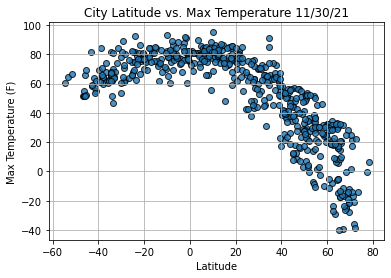

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

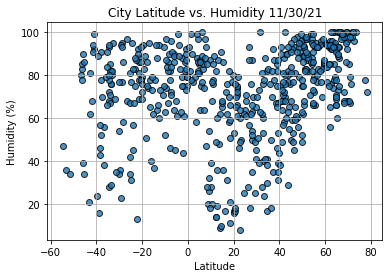

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

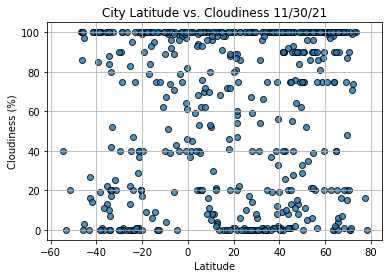

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

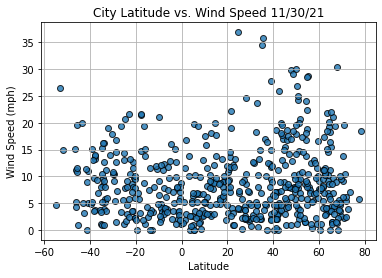

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()